In [1]:
#from google.colab import drive
import pandas as pd
import random

### Used for traing

In [2]:
df = pd.read_csv("bolzanosynthetic.csv")
# drop room1 room2 room3
df = df.drop(['room1', 'room2', 'room3'], axis=1)
df

,temp,humidity,windspeed,winddir,cloudcover,uvindex,encons
0,9.6,75.5,14.8,182.0,58.7,3,3.41
1,8.9,82.7,9.6,61.7,26.9,5,3.29
2,9.8,85.8,14.0,158.9,68.1,5,3.43
3,7.0,84.8,23.9,57.8,69.4,5,3.77
4,6.2,65.9,20.4,330.5,7.6,5,3.52
5,4.7,70.5,17.9,311.0,30.1,5,3.77
6,5.5,70.2,7.7,54.9,37.8,5,3.68
7,4.9,70.2,12.6,251.6,28.7,5,3.72
8,5.8,82.3,13.3,235.6,57.7,4,3.78
9,8.0,90.9,14.1,250.1,53.8,3,3.54


# Training and Model evaluation

Model Mean Squared Error with K-Fold Cross-Validation: 0.04638333333333331
Model Mean Squared Error with K-Fold Cross-Validation: 0.036739999999999974
Model Mean Squared Error with K-Fold Cross-Validation: 0.03075666666666665
Model Mean Squared Error with K-Fold Cross-Validation: 0.046093333333333306
Model Mean Squared Error with K-Fold Cross-Validation: 0.037726666666666665
Model Mean Squared Error with K-Fold Cross-Validation: 0.03972333333333332
Model Mean Squared Error with K-Fold Cross-Validation: 0.03164666666666665
Model Mean Squared Error with K-Fold Cross-Validation: 0.032449999999999986
Model Mean Squared Error with K-Fold Cross-Validation: 0.044453333333333324
Model Mean Squared Error with K-Fold Cross-Validation: 0.04539666666666665


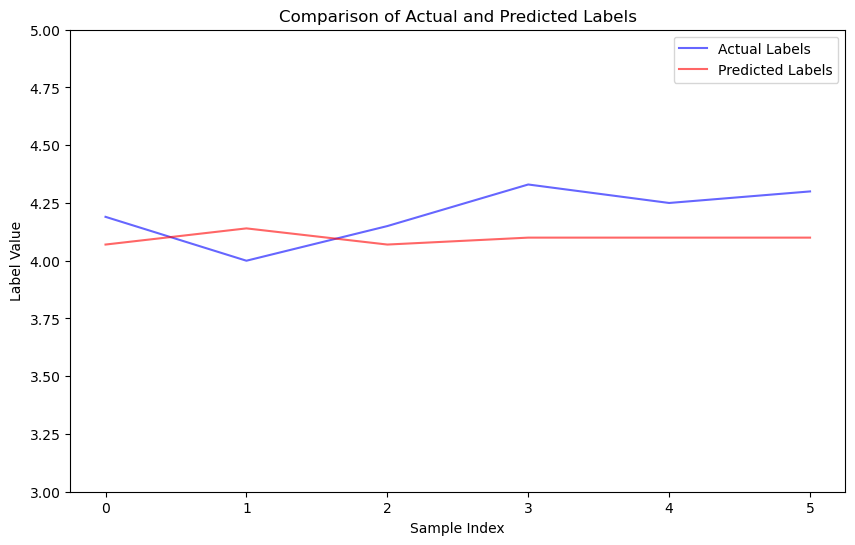

In [6]:

# Store the actual and predicted labels
from matplotlib import pyplot as plt
from sklearn.calibration import cross_val_predict
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
import pickle


actual_labels = []
predicted_labels = []

# seletect the first 6 column as features
X = df.iloc[:, :6]
# select the last column as label
y = df.iloc[:, 6]

model = DecisionTreeRegressor()

# Perform K-Fold cross-validation
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Append the actual and predicted labels for plotting
    actual_labels.extend(y_test)
    predicted_labels.extend(y_pred)

    # Evaluate the model using cross-validation
    y_pred_cv = cross_val_predict(model, X, y, cv=kf)
    mse_cv = mean_squared_error(y, y_pred_cv)
    print(f'Model Mean Squared Error with K-Fold Cross-Validation: {mse_cv}')
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Append the actual and predicted labels for plotting
    actual_labels.extend(y_test)
    predicted_labels.extend(y_pred)

    # Evaluate the model using cross-validation
    y_pred_cv = cross_val_predict(model, X, y, cv=kf)
    mse_cv = mean_squared_error(y, y_pred_cv)
    print(f'Model Mean Squared Error with K-Fold Cross-Validation: {mse_cv}')

    # save the model

    filename = 'model.sav'
    pickle.dump(model, open(filename, 'wb'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Labels', alpha=0.6)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Labels', alpha=0.6)
plt.title('Comparison of Actual and Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label Value')
plt.ylim(3, 5) # set the y-axis limits
plt.legend()
plt.show()

